# Trabajo Kaggle

## Pasos iniciales

In [1]:
# Instalacion de librerias a utilizar
!pip install tensorflow
!pip install -q keras-core
!pip install -q scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 924.6/924.6 kB 4.5 MB/s eta 0:00:00


### Imports

In [2]:
# Aqui importamos las librerias que vamos a utilizar

import numpy as np
import pandas as pd
import os
import seaborn as sns
import keras_core as keras
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Activation


Using TensorFlow backend


### Settings del enviroment

In [3]:
os.environ['KERAS_BACKEND'] = "tensorflow"
SEED = 37
keras.utils.set_random_seed(SEED)

### Importacion de la data

Utilizar el import que sea adecuado a si se esta trabajando con google collab o en un jupyter notebook con los recursos de su propia maquina

In [4]:
# Google collab imports

from google.colab import drive
drive.mount('/content/drive')

df_training = pd.read_csv('/content/drive/MyDrive/inf-395-tarea-1/data_kaggle/data/train_data.csv')
df_testing = pd.read_csv('/content/drive/MyDrive/inf-395-tarea-1/data_kaggle/data/test_data.csv')

Mounted at /content/drive


In [5]:
# Import de data sin collab

# df_training = pd.read.scv("file location")
# df_testing = pd.read.scv("file location")



---


## Seccion 1: Lectura y procesamiento de la data


### 1.1: Lectura de data de entrenamiento

In [6]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             1276 non-null   int64  
 1   date           1276 non-null   object 
 2   zipcode        1276 non-null   int64  
 3   lat            1276 non-null   float64
 4   long           1276 non-null   float64
 5   bedrooms       1074 non-null   float64
 6   bathrooms      1079 non-null   float64
 7   sqft_living    1082 non-null   float64
 8   sqft_lot       1087 non-null   float64
 9   floors         1084 non-null   float64
 10  waterfront     1076 non-null   float64
 11  view           1082 non-null   float64
 12  condition      1095 non-null   float64
 13  grade          1086 non-null   float64
 14  sqft_above     1089 non-null   float64
 15  sqft_basement  1093 non-null   float64
 16  yr_built       1113 non-null   float64
 17  yr_renovated   1075 non-null   float64
 18  sqft_liv

In [7]:
# Revisamos la data de manera general, identificar el tipo de data que es y revisar por la existencia de valores NaN en las columnas

# Revision general de la data
numerical_features = df_training.select_dtypes(include=[np.number])
numerical_features

,ID,zipcode,lat,long,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
0,143,98003,47.2857,-122.300,3.0,2.25,1590.0,7748.0,2.0,0.0,0.0,4.0,7.0,1590.0,0.0,1991.0,0.0,1590.0,7606.0,263000.0
1,1175,98117,47.6885,-122.380,3.0,NaN,2040.0,4005.0,NaN,0.0,0.0,4.0,8.0,1740.0,300.0,1930.0,0.0,1380.0,4005.0,620000.0
2,221,98106,47.5150,-122.359,2.0,1.00,640.0,7768.0,1.0,0.0,0.0,3.0,6.0,640.0,0.0,1942.0,0.0,NaN,7424.0,165000.0
3,1231,98144,47.5758,-122.309,2.0,1.50,1240.0,NaN,NaN,0.0,0.0,NaN,8.0,1080.0,160.0,NaN,0.0,1530.0,1209.0,403000.0
4,509,98038,47.3531,-122.017,3.0,NaN,1990.0,NaN,2.0,0.0,NaN,3.0,7.0,1990.0,0.0,2010.0,0.0,2580.0,3800.0,318200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,954,98014,47.6820,-121.913,3.0,2.50,3230.0,129578.0,1.0,0.0,0.0,NaN,NaN,2100.0,1130.0,NaN,0.0,2760.0,62059.0,499950.0
1272,104,98103,47.6857,-122.353,4.0,1.50,NaN,4000.0,1.5,NaN,2.0,NaN,7.0,1580.0,NaN,1920.0,1990.0,1160.0,4000.0,750000.0
1273,138,98003,47.2827,-122.302,3.0,NaN,NaN,6600.0,NaN,0.0,NaN,3.0,7.0,1610.0,0.0,NaN,0.0,1660.0,NaN,250000.0
1274,1529,98075,47.5884,-122.086,3.0,2.25,3000.0,11665.0,1.5,1.0,4.0,3.0,11.0,3000.0,0.0,2001.0,0.0,3000.0,15959.0,2400000.0


In [8]:
# Resumen estadistico para las features numericas

numerical_features = df_training.select_dtypes(include=[np.number])
numerical_features.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1276.0,783.208464,459.141821,1.0000,384.750,778.5000,1182.25000,1.592000e+03
zipcode,1276.0,98076.235110,54.734005,98001.0000,98029.000,98059.0000,98117.00000,9.819900e+04
lat,1276.0,47.567730,0.137067,47.1622,47.492,47.5882,47.68130,4.777750e+01
long,1276.0,-122.207464,0.147224,-122.5110,-122.339,-122.2150,-122.10975,-1.214020e+02
bedrooms,1074.0,3.388268,0.937513,1.0000,3.000,3.0000,4.00000,1.000000e+01
bathrooms,1079.0,2.148054,0.853977,0.0000,1.500,2.2500,2.50000,7.500000e+00
sqft_living,1082.0,2140.665434,977.118984,540.0000,1420.000,1990.0000,2620.00000,7.000000e+03
sqft_lot,1087.0,22913.940202,52877.670777,638.0000,5383.000,8145.0000,14578.50000,7.156900e+05
floors,1084.0,1.496771,0.534790,1.0000,1.000,1.5000,2.00000,3.000000e+00
waterfront,1076.0,0.011152,0.105063,0.0000,0.000,0.0000,0.00000,1.000000e+00


In [9]:
# Valores NaN en el dataset

print("Number of NaN per column")
print(df_training.isnull().sum())

# Porcentaje de valores NaN en cada tabla

print("\nPercentage of NaN values per column")
print((df_training.isnull().sum() / len(df_training))*100)


Number of NaN per column
ID                 0
date               0
zipcode            0
lat                0
long               0
bedrooms         202
bathrooms        197
sqft_living      194
sqft_lot         189
floors           192
waterfront       200
view             194
condition        181
grade            190
sqft_above       187
sqft_basement    183
yr_built         163
yr_renovated     201
sqft_living15    189
sqft_lot15       196
price              0
dtype: int64

Percentage of NaN values per column
ID                0.000000
date              0.000000
zipcode           0.000000
lat               0.000000
long              0.000000
bedrooms         15.830721
bathrooms        15.438871
sqft_living      15.203762
sqft_lot         14.811912
floors           15.047022
waterfront       15.673981
view             15.203762
condition        14.184953
grade            14.890282
sqft_above       14.655172
sqft_basement    14.341693
yr_built         12.774295
yr_renovated     15.75235



---


### 1.2: Grafos

- Que informacion nos brindan los grafos?
- Que relaciones tiene la data?

<Axes: >

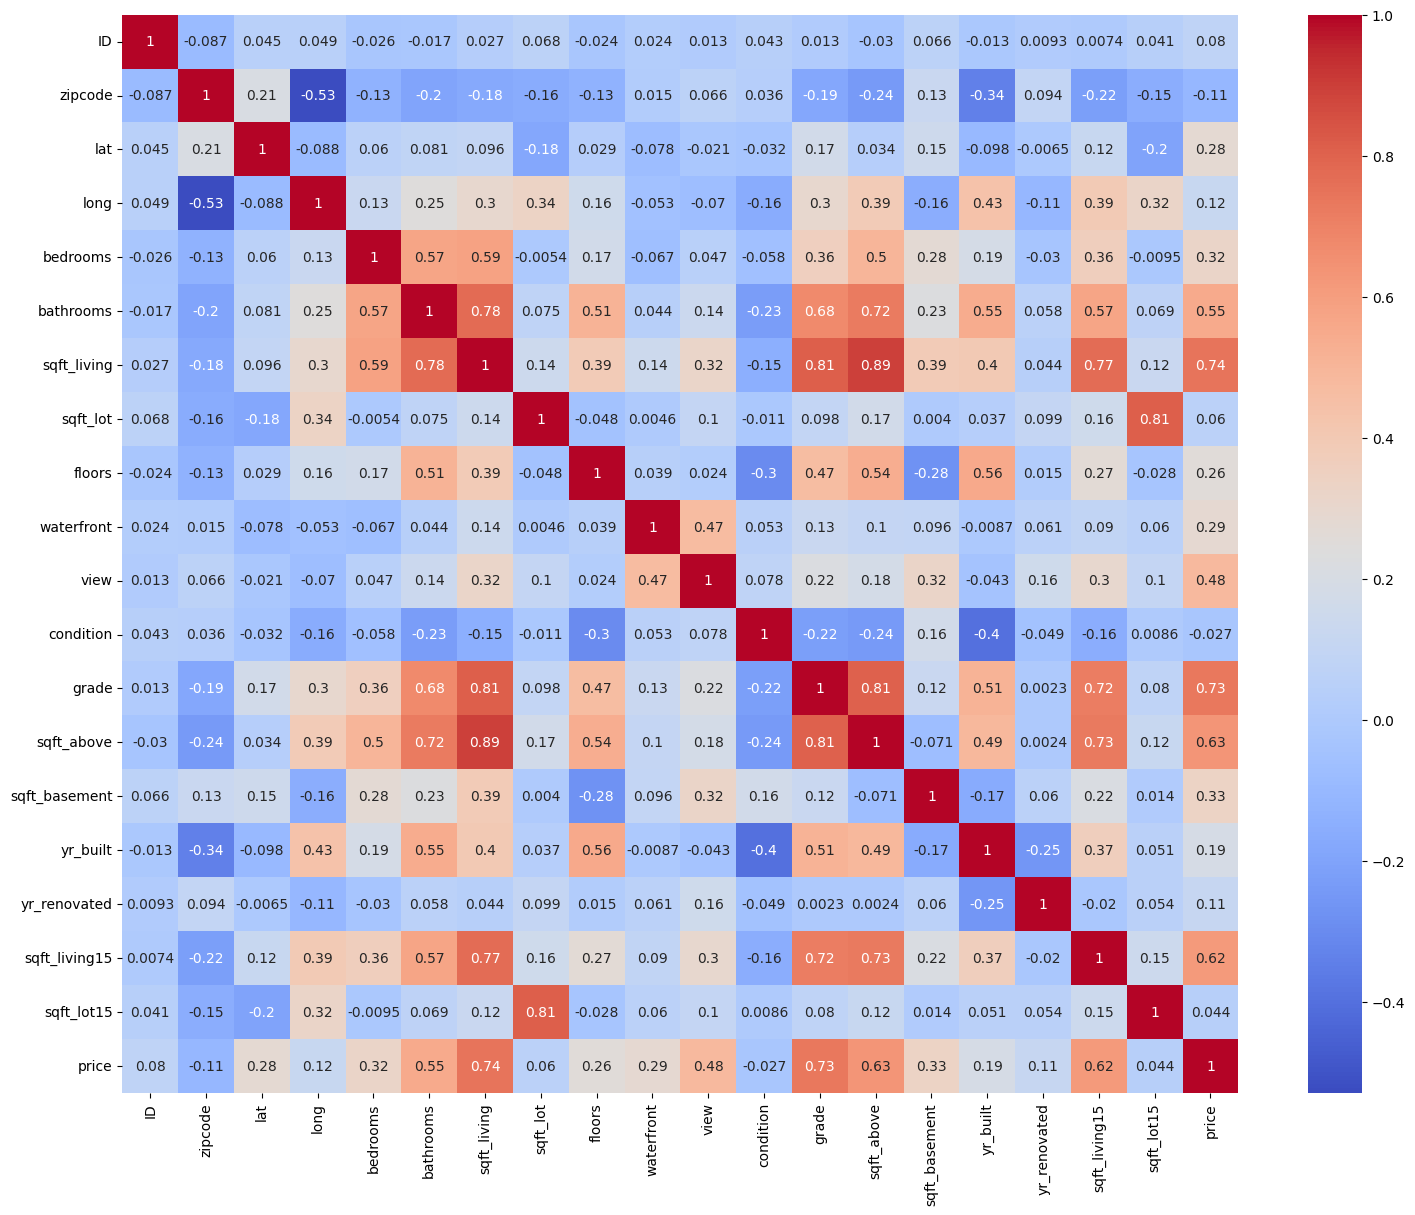

In [10]:
# Matriz de correlacion de dataset de entrenamiento

plt.figure(figsize=[18,14])
sns.heatmap(df_training.select_dtypes(include=[np.number]).corr(), annot = True, cmap= 'coolwarm')



Simplemente viendo la matriz de correlacion podemos ver que datos tienen mayor correlacion con el precio y cuales tienen correlacion baja, por ejemplo, el zipcode tiene la correlacion mas baja con el precio que cualquier otro campo, mientras que el sqft_living es la variable mas correlacionada al precio.

Podemos considerar valores > .7 como correlaciones significativas, por lo que podemos mantenerlas en cuenta si las vamos a remover o no

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'zipcode'}>,
        <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

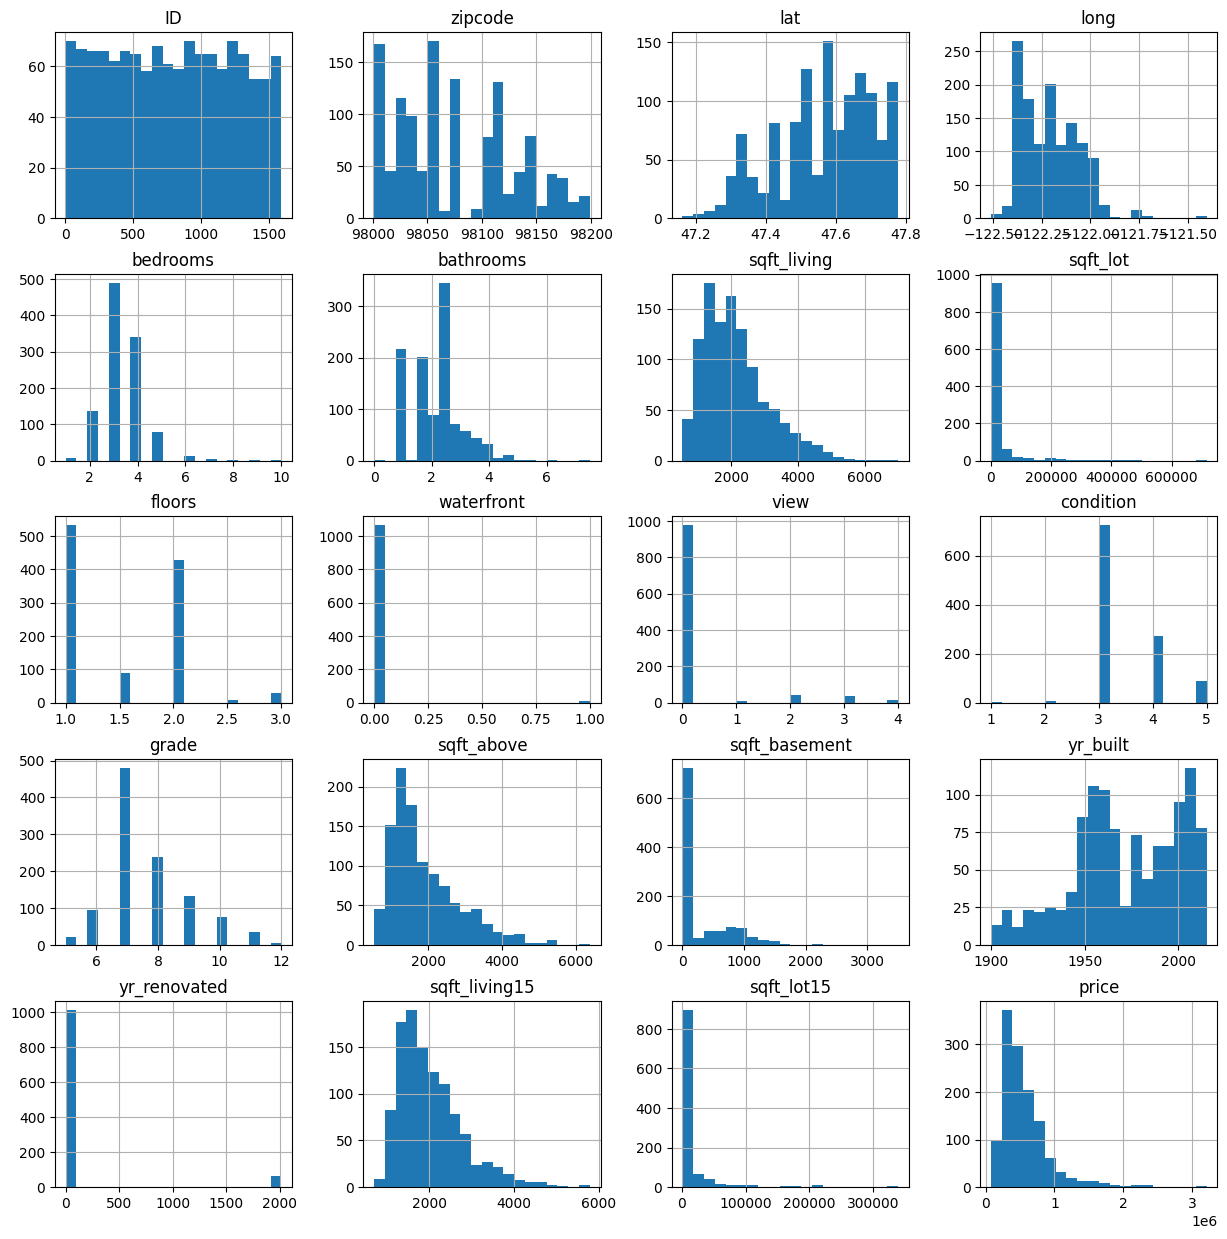

In [11]:
# Histogramas de densidad para las columnas del dataset

df_training.hist(figsize=(15,15), layout=(5,4), bins=20)

---
## Seccion 2: Procesamiento del dataframe

Aqui planeamos hacerle modificaciones al dataframe, desde las transformaciones de columnas, relleno campos NaN, botar columnas y otras acciones asociadas a feature selection.

- Cuando vamos a separar la data
- Como rellenaremos los NaN
- Normalizaremos la data?
- Que data vamos a omitir del modelo?

### 2.1: Separacion del dataframe

In [254]:
# Antes que cualquier otra cosa, voy a separar el dataframe de entrenamiento en uno de entrenamiento y otro de test,
# para asi poder medir el rendimiento de algun modelo ya que es el unico dataset que se nos entrega que contiene todos los datos
from sklearn.model_selection import train_test_split

# Asignaremos la separacion como 70% entrenamiento, 20% test, 10% validacion

df_train, df_test = train_test_split(df_training, test_size=0.3, random_state=8913 )

#### 2.1.1: Exploracion de los nuevos dataframes

##### 2.1.1.1: Informacion df_train

In [13]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1020.0,797.692157,463.504891,1.0000,394.2500,791.50000,1209.50000,1.592000e+03
zipcode,1020.0,98074.064706,54.696986,98001.0000,98028.0000,98058.00000,98117.00000,9.819900e+04
lat,1020.0,47.564975,0.139646,47.1622,47.4886,47.58765,47.68110,4.777750e+01
long,1020.0,-122.206027,0.144924,-122.5110,-122.3380,-122.21400,-122.10775,-1.214020e+02
bedrooms,864.0,3.398148,0.937834,1.0000,3.0000,3.00000,4.00000,1.000000e+01
bathrooms,859.0,2.166182,0.835782,0.7500,1.6250,2.25000,2.50000,7.500000e+00
sqft_living,865.0,2166.692486,980.343189,540.0000,1450.0000,2010.00000,2620.00000,7.000000e+03
sqft_lot,872.0,23133.559633,54198.802938,746.0000,5400.0000,8198.50000,14489.25000,7.156900e+05
floors,863.0,1.508691,0.539275,1.0000,1.0000,1.50000,2.00000,3.000000e+00
waterfront,881.0,0.011351,0.105994,0.0000,0.0000,0.00000,0.00000,1.000000e+00


In [14]:
# Valores NaN en el dataset
print("Number of NaN per column")
print(df_train.isnull().sum())

# Porcentaje de valores NaN en cada tabla
print("\nPercentage of NaN values per column")
print((df_train.isnull().sum() / len(df_train))*100)

Number of NaN per column
ID                 0
date               0
zipcode            0
lat                0
long               0
bedrooms         156
bathrooms        161
sqft_living      155
sqft_lot         148
floors           157
waterfront       139
view             149
condition        148
grade            145
sqft_above       145
sqft_basement    144
yr_built         135
yr_renovated     162
sqft_living15    153
sqft_lot15       162
price              0
dtype: int64

Percentage of NaN values per column
ID                0.000000
date              0.000000
zipcode           0.000000
lat               0.000000
long              0.000000
bedrooms         15.294118
bathrooms        15.784314
sqft_living      15.196078
sqft_lot         14.509804
floors           15.392157
waterfront       13.627451
view             14.607843
condition        14.509804
grade            14.215686
sqft_above       14.215686
sqft_basement    14.117647
yr_built         13.235294
yr_renovated     15.88235

##### 2.1.1.2: Informacion df_test

In [15]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,256.0,725.500000,437.457404,8.0000,340.750000,732.0000,1052.75000,1.582000e+03
zipcode,256.0,98084.882812,54.127898,98001.0000,98040.000000,98075.0000,98122.00000,9.819900e+04
lat,256.0,47.578707,0.125928,47.1967,47.497925,47.5926,47.68240,4.777660e+01
long,256.0,-122.213188,0.156215,-122.5110,-122.340000,-122.2455,-122.11175,-1.214170e+02
bedrooms,210.0,3.347619,0.937327,1.0000,3.000000,3.0000,4.00000,7.000000e+00
bathrooms,220.0,2.077273,0.920186,0.0000,1.437500,2.0000,2.50000,5.500000e+00
sqft_living,217.0,2036.917051,959.380183,680.0000,1280.000000,1840.0000,2620.00000,5.150000e+03
sqft_lot,215.0,22023.204651,47247.812566,638.0000,5110.000000,8015.0000,14086.00000,3.876840e+05
floors,221.0,1.450226,0.515454,1.0000,1.000000,1.0000,2.00000,3.000000e+00
waterfront,195.0,0.010256,0.101013,0.0000,0.000000,0.0000,0.00000,1.000000e+00


In [16]:
# Valores NaN en el dataset
print("Number of NaN per column")
print(df_test.isnull().sum())

# Porcentaje de valores NaN en cada tabla
print("\nPercentage of NaN values per column")
print((df_test.isnull().sum() / len(df_test))*100)

Number of NaN per column
ID                0
date              0
zipcode           0
lat               0
long              0
bedrooms         46
bathrooms        36
sqft_living      39
sqft_lot         41
floors           35
waterfront       61
view             45
condition        33
grade            45
sqft_above       42
sqft_basement    39
yr_built         28
yr_renovated     39
sqft_living15    36
sqft_lot15       34
price             0
dtype: int64

Percentage of NaN values per column
ID                0.000000
date              0.000000
zipcode           0.000000
lat               0.000000
long              0.000000
bedrooms         17.968750
bathrooms        14.062500
sqft_living      15.234375
sqft_lot         16.015625
floors           13.671875
waterfront       23.828125
view             17.578125
condition        12.890625
grade            17.578125
sqft_above       16.406250
sqft_basement    15.234375
yr_built         10.937500
yr_renovated     15.234375
sqft_living15    14

### 2.2: Funciones para hacer transformaciones

In [215]:
# Para poder usar el simpleimputer vamos a necesitar transformar la data de fecha a un formato numerico, para esto nos podemos basar en lo que fue logrado durante la tarea 1 de esta asignatura,
# que significa que le vamos a aplicar una transformacion ciclica con seno y coseno
# Vamos a tolerar una perdida de precision con las fechas asumiendo que van a haber 30 dias en cada mes

def preprocess_time(df, column, period):
    df['sin_'+column] = np.sin(2 * np.pi * df[column] / period)
    df['cos_'+column] = np.cos(2 * np.pi * df[column] / period)
    df.drop([column], axis=1, inplace=True)
    return df

In [216]:
# Vamos a crear una funcion para poder aplicar esta transformacion sobre un dataframe de manera mas efectiva

def transform_time(data):
  data['date'] = pd.to_datetime(data['date'])

  data['day'] = data['date'].dt.day
  data['month'] = data['date'].dt.month

  data = preprocess_time(data, 'day', 30)
  data = preprocess_time(data, 'month', 12)

  data = data.drop('date', axis='columns')
  return data

Otra variable que vamos a querer modificar para que mejor se ajuste a nuestro modelo van a ser las variables longitud y latitud, las cuales vamos a convertir en coordenadas polares.

In [19]:
# Tambien crearemos una funcion para convertir coordenadas de longitud y latitud a coordenadas polares

def loc_to_pol(data):
  data['lat_radius'] = np.tan(data['lat'].astype(float))
  data['long_angle'] = np.pi/2 - np.tan(data['long'].astype(float))

  data = data.drop('lat', axis='columns')
  data = data.drop('long', axis='columns')
  return data

In [20]:
# Create a polar plot
# Quick function to create a polar plot for a dataset
def polar_plt(data):
  fig = plt.figure(figsize=(6, 6))
  ax = fig.add_subplot(111, projection='polar')

  # Plot the data
  ax.plot(data['long_angle'], data['lat_radius'], marker='o')

  # Customize the plot (optional)
  ax.set_title('Polar Plot Example')
  ax.set_rlabel_position(90)  # Set radial labels on top

  # Show the plot
  plt.show()

## Seccion 3: Preprocesamiento

En esta seccion vamos a aplicarle las transformaciones y tecnicas de preprocesamiento de informacion a los dataframes creados en la seccion anterior.

### 3.1: Tiempo ciclico + coordenadas polares

In [255]:
# Transformacion de columna "date" a nuevas columnas de representacion ciclica: month y day (ambas se componen de cos y sin)

df_train = transform_time(df_train)
df_test = transform_time(df_test)

# Tambien haremos las tranformaciones de coordenadas latitud y longitud a coordenadas polares

df_train = loc_to_pol(df_train)
df_test = loc_to_pol(df_test)

### 3.2: Rellenar NaN con SimpleImputer

Ahora vamos a utilizar simpleImputing con df_train para rellenar los valores NaN de df_train y en base a ese fit, rellenar los NaN de df_test

In [256]:
# SimpleImputer utilizando como estrategia de relleno "median"
print("SimpleImputer\n")
print('df_train Before Imputing \nMissing: %d' % df_train.isnull().sum().sum())
print('df_test Before Imputing \nMissing: %d' % df_test.isnull().sum().sum())

imputer = SimpleImputer(strategy='median')
# Le hacemos fit al imputer con la informacion de el set de entrenamiento
imputer.fit(df_train)

df_train_tr = imputer.transform(df_train)
df_test_tr = imputer.transform(df_test)

df_train = pd.DataFrame(df_train_tr, columns=df_train.columns)
df_test = pd.DataFrame(df_test_tr, columns=df_test.columns)

print('\n df_train After Imputing \nMissing: %d' % df_train.isnull().sum().sum())
print('\n df_test After Imputing \nMissing: %d' % df_test.isnull().sum().sum())

SimpleImputer

df_train Before Imputing 
Missing: 2008
df_test Before Imputing 
Missing: 850

 df_train After Imputing 
Missing: 0

 df_test After Imputing 
Missing: 0


In [23]:
# funcion completa de preprocesamiento para un solo dataframe, toma el dataframe de entrenamiento y el de testeo, aplica las conversiones de fechas, localizacion y
# rellena los valores NaN del set de testeo a base de un simpleimputer fitteado con el det de entrenamiento

def final_process(testing_set):
  # Transformacion de columna "date" a nuevas columnas de representacion ciclica: month y day (ambas se componen de cos y sin)

  testing_set = transform_time(testing_set)

  # Tambien haremos las tranformaciones de coordenadas latitud y longitud a coordenadas polares

  testing_set = loc_to_pol(testing_set)

  imputer = SimpleImputer(strategy='median')
  # Le hacemos fit al imputer con la informacion de el set de entrenamiento
  # tenemos que pasarlo sin la columna de precio, sino no va a funcionar para el testing set
  imputer.fit(testing_set)

  testing_set_tr = imputer.transform(testing_set)

  testing_set = pd.DataFrame(testing_set_tr, columns=testing_set.columns)
  return testing_set


### 3.3 Datos a predecir (entrenamiento)

In [257]:
X_train = df_train.drop(['ID','price'], axis='columns')
X_test = df_test.drop(['ID','price'], axis='columns')

# Vamos a aprovechar de normalizar la data de precio con una funcion logaritmica
y_train = df_train['price']
y_test = df_test['price']

Le aplicaremos standardScaler a todos los campos menos el tiempo (cos y sin) y las coordenadas polares

In [245]:
# Primero, Probaremos usando standardscaler a la data perteneciente a X

ss = StandardScaler()

X_train.iloc[:,:-6] = ss.fit_transform(X_train.iloc[:,:-6])
X_test.iloc[:,:-6] = ss.fit_transform(X_test.iloc[:,:-6])

In [246]:
# ahora intentaremos de normalizar la data de precios

y_train = np.log(y_train)
y_test = np.log(y_test)

## Seccion 4: Construccion de modelo predictivo

Probaremos una primera implementacion de un modelo para poder predecir los precios de hogares, en esta primera implementacion vamos a usar todas las columnas como input, y de poco a poco se vera cuales sacar para disminuir el feature space

In [247]:
def plot_losses(history, loss):
  "Función para graficar la función de pérdida del modelo"
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Error Graph')
  plt.ylabel(loss.name)
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

### 4.1 Contruccion del modelo y sus settings

In [248]:
# Crearemos un modelo de regresion super simple, utilizando 1 neurona en la capa de salida con funcion de activacion lineal
# 2 capas ocultas con funcion de activacion ReLu y funcion de perdida Mean Squared Error

inputs = keras.layers.Input(shape=(X_train.shape[1],))

x = keras.layers.Dense(18,activation='relu')(inputs)
x = keras.layers.Dense(18,activation='relu')(x)
#x = keras.layers.Dropout(0.1)(x)

output = keras.layers.Dense(1, activation='linear')(x)

model1 = keras.Model(inputs=inputs, outputs=output)

loss= keras.losses.MeanSquaredError()

model1.compile(
    optimizer='adam',
    loss=loss,
    metrics=["mean_squared_error", "mean_absolute_error", "root_mean_squared_error"]
    )

model1.summary()

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 22)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_57 (Dense)                │ (None, 18)                │        414 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_58 (Dense)                │ (None, 18)                │        342 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_59 (Dense)                │ (None, 1)                 │         19 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 775 (3.03 KB)

 Trainable params: 775 (3.03 KB)

 Non-trainable params: 0 (0.00 B)

In [249]:
my_callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        min_delta=0,
        patience=10,
        restore_best_weights = True
    )
]

In [250]:
history = model1.fit(X_train,
                    y_train,
                    epochs= 200,
                    batch_size = 32,
                    validation_split = 0.15,
                    callbacks = my_callbacks,
                    verbose=1
                    )

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 174.8230 - mean_absolute_error: 13.2060 - mean_squared_error: 174.8299 - root_mean_squared_error: 13.2221 - val_loss: 163.1128 - val_mean_absolute_error: 12.7550 - val_mean_squared_error: 163.0121 - val_root_mean_squared_error: 12.7676
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 157.2726 - mean_absolute_error: 12.5251 - mean_squared_error: 157.2785 - root_mean_squared_error: 12.5407 - val_loss: 144.6064 - val_mean_absolute_error: 11.9760 - val_mean_squared_error: 143.8316 - val_root_mean_squared_error: 11.9930
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 136.0124 - mean_absolute_error: 11.6392 - mean_squared_error: 136.0196 - root_mean_squared_error: 11.6618 - val_loss: 119.4106 - val_mean_absolute_error: 10.8218 - val_mean_squared_error: 117.9732 - val_root_mean_squared_error: 10.8615
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 107.5205 - mean_absolute_error: 10.3115 - mean_squared_

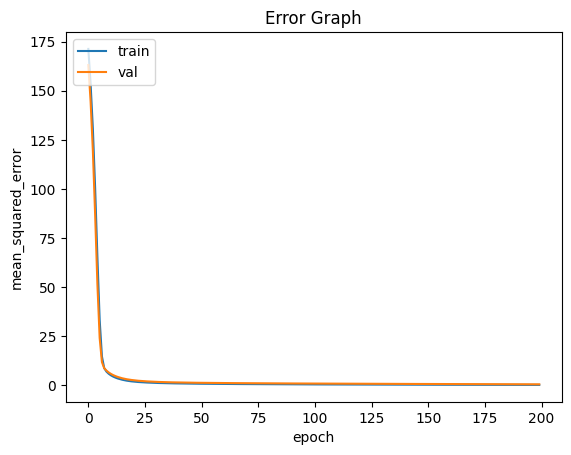

In [251]:
plot_losses(history, loss)

### 4.2 Evaluacion de modelo construido

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step


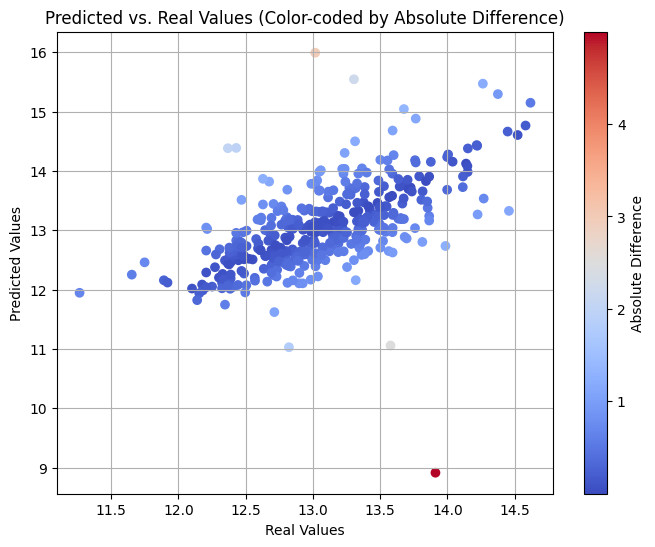

In [252]:
# Generamos una prediccion con un set de testeo normalizado para visualisar el rendimiento del modelo creado

y_pred = model1.predict(X_test)
y_pred = y_pred.flatten()

differences = np.abs(y_pred - y_test)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c=differences, cmap='coolwarm', marker='o')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Real Values (Color-coded by Absolute Difference)')
plt.colorbar(label='Absolute Difference')
plt.grid(True)
plt.show()

In [253]:
score = model1.evaluate(X_test, y_test, verbose=0)
print("Mean Square Error:", score[0])
print("Mean absolute error: ", score[1])

Mean Square Error: 0.34978318214416504
Mean absolute error:  0.4051349461078644


In [208]:
model1.save('drive/MyDrive/inf-395-tarea-1/epoch500_adam_minmax_4hidden2.keras')

### 4.3 Evaluacion de modelo con data nueva no normalizada

Aqui hare una prueba post creacion de modelo, usaremos data pura y no normalizada ni ajustada, los resultados van a ser los verdaderos resultados

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


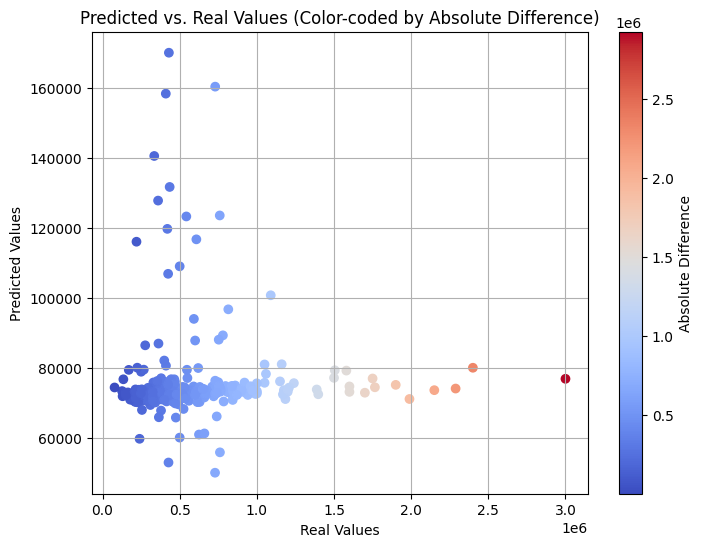

In [315]:
y_pred_real = model1.predict(X_test)
y_pred_real = y_pred_real.flatten()

differences = np.abs(y_pred_real - y_test)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_real, c=differences, cmap='coolwarm', marker='o')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Real Values (Color-coded by Absolute Difference)')
plt.colorbar(label='Absolute Difference')
plt.grid(True)
plt.show()

In [259]:
score_real = model1.evaluate(X_test, y_test, verbose=0)
print("Mean Square Error:", score_real[0])
print("Mean absolute error: ", score_real[1])

Mean Square Error: 353673314304.0
Mean absolute error:  467843.875


Hora de crear una cosa para pasar las predicciones a solo id con su precio

## Seccion 5: Prediccion de resultados y creacion de archivo .csv final

In [260]:
# Cargamos nuestro modelo a usar
from keras.models import load_model

# Aqui estoy importando el mejor modelo que logre entrenar
model_path = '/content/drive/MyDrive/inf-395-tarea-1/epoch200_adamw_minmax_4hidden.keras'

best_model = load_model(model_path)

In [261]:
# df_testing
df_testing = final_process(df_testing)

In [314]:
id_df = df_testing[['ID']].copy()

predictions = []

for index, row in df_testing.iterrows():
    # Exclude the 'ID' column and convert the row to a NumPy array
    input_features = row.drop('ID').values.reshape(1, -1)

    # Make predictions using your model
    prediction = best_model.predict(input_features)

    # Append the prediction to the list
    predictions.append(prediction[0][0])

predictions_df = pd.DataFrame({'ID': id_df['ID'], 'price': predictions})
predictions_df.to_csv('predictions.csv', index=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━